# Load libraries

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import numpy as np
%matplotlib notebook

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sn

# Load dataset

In [2]:
# load dataset
df = pd.read_csv("./iris.data", header = None)

In [3]:
# display first samples
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# add column names
df.columns = [
    "sepal length [cm]",
    "sepal width [cm]",
    "petal length [cm]",
    "petal width [cm]",
    "species",
]

In [5]:
# dislay data frame again
df.head()

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# check species names
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# mapping  to classes
mappings = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica":2,
}

# transform the classes
df["species"] = df["species"].apply(lambda x: mappings[x])

In [8]:
# display dataset
df.head()

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df["species"].unique()

array([0, 1, 2])

# Display and analyze data

In [10]:
# color mapping
colorMap = {
    0: "r",
    1: "g",
    2: "b",
}

# array with colors
colors = df["species"].apply(lambda x: colorMap[x])

<IPython.core.display.Javascript object>


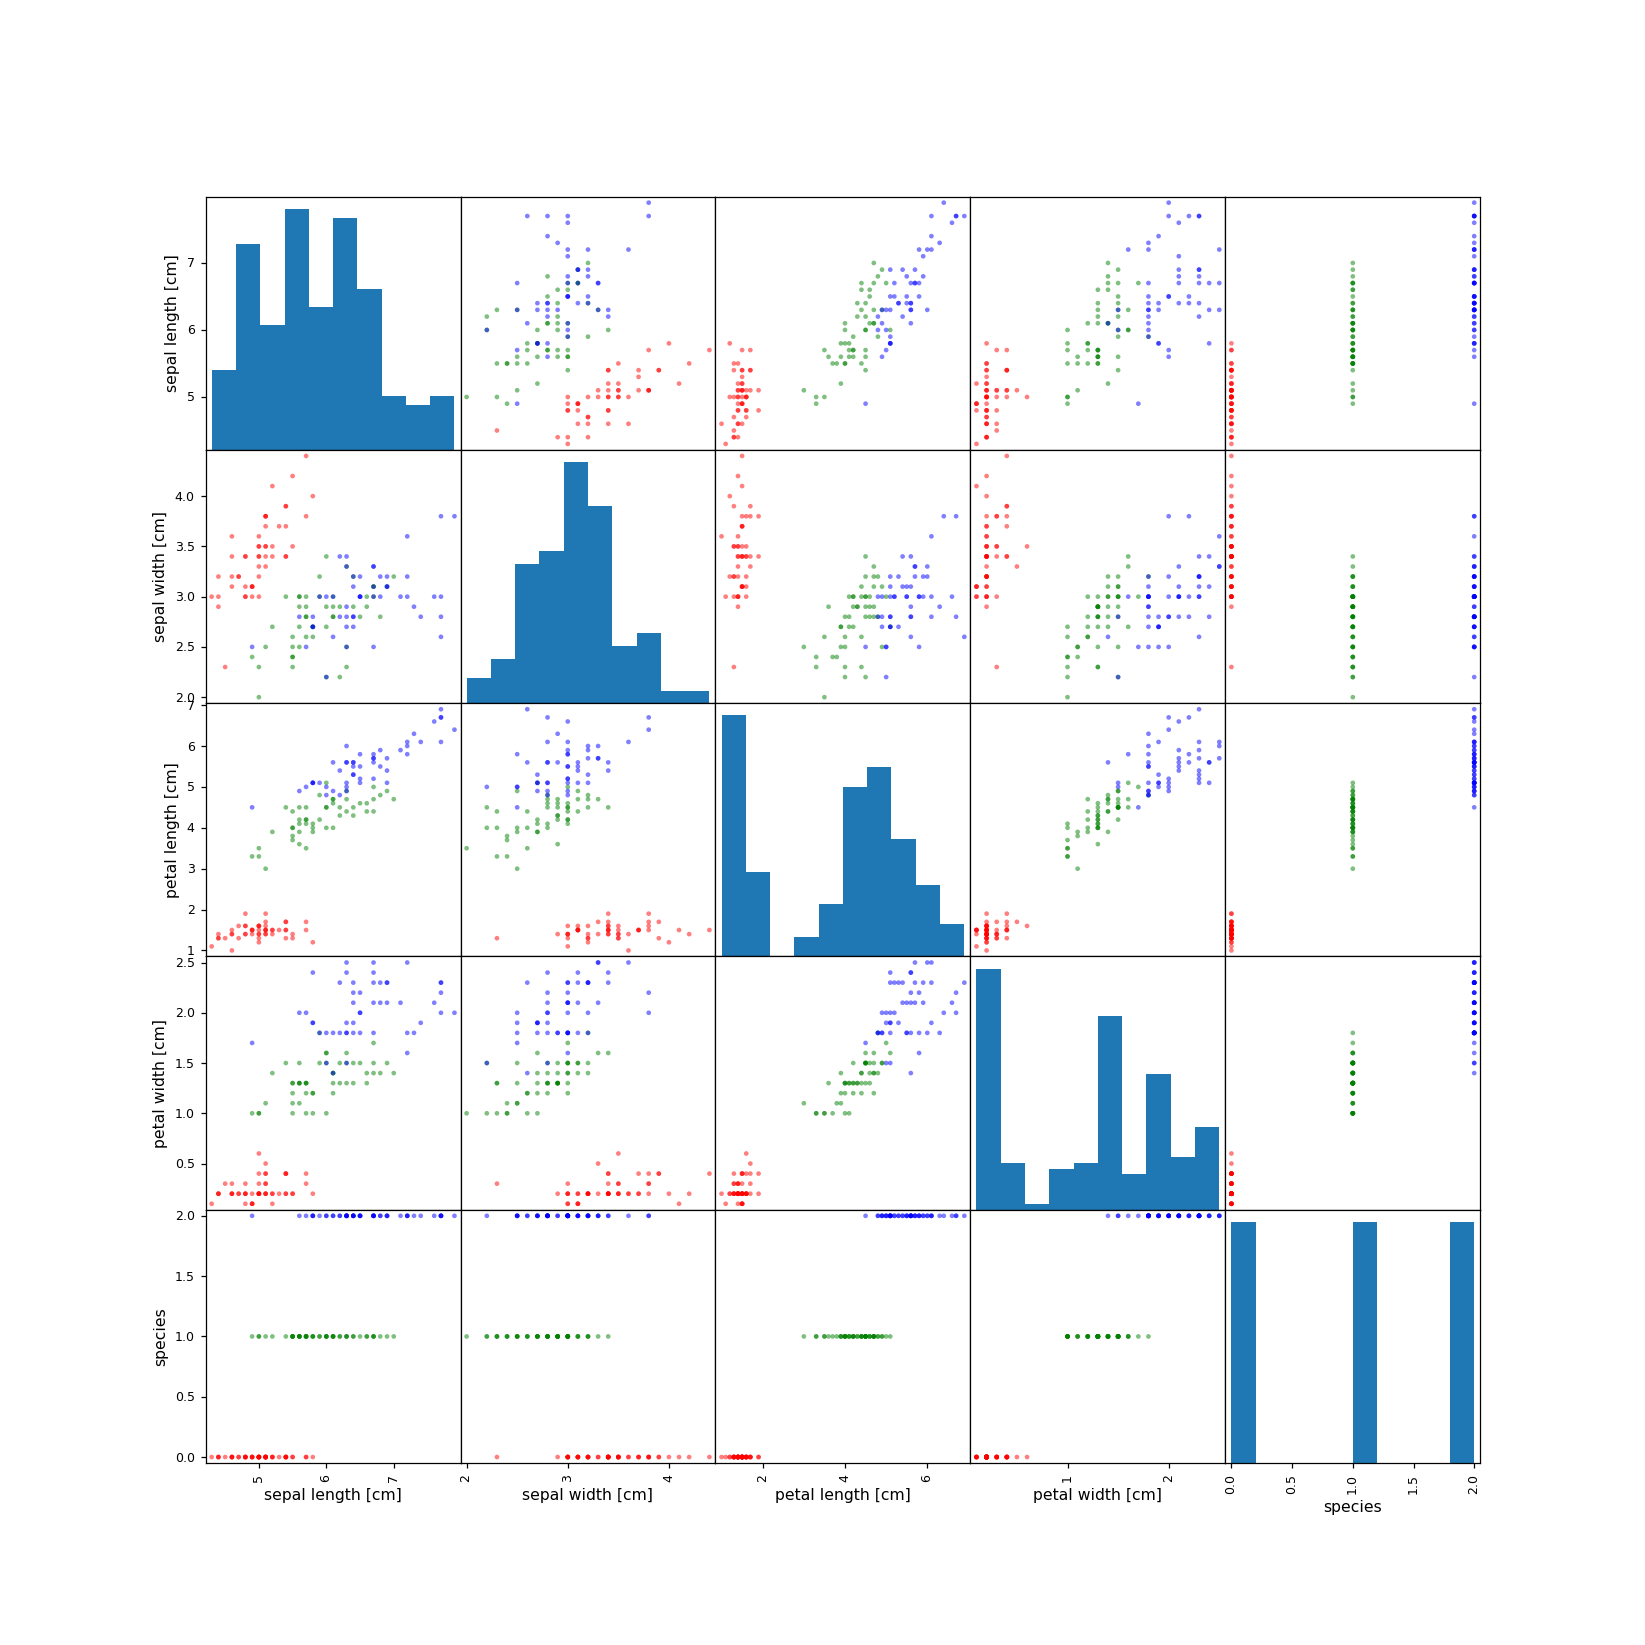

array([[<AxesSubplot:xlabel='sepal length [cm]', ylabel='sepal length [cm]'>,
        <AxesSubplot:xlabel='sepal width [cm]', ylabel='sepal length [cm]'>,
        <AxesSubplot:xlabel='petal length [cm]', ylabel='sepal length [cm]'>,
        <AxesSubplot:xlabel='petal width [cm]', ylabel='sepal length [cm]'>,
        <AxesSubplot:xlabel='species', ylabel='sepal length [cm]'>],
       [<AxesSubplot:xlabel='sepal length [cm]', ylabel='sepal width [cm]'>,
        <AxesSubplot:xlabel='sepal width [cm]', ylabel='sepal width [cm]'>,
        <AxesSubplot:xlabel='petal length [cm]', ylabel='sepal width [cm]'>,
        <AxesSubplot:xlabel='petal width [cm]', ylabel='sepal width [cm]'>,
        <AxesSubplot:xlabel='species', ylabel='sepal width [cm]'>],
       [<AxesSubplot:xlabel='sepal length [cm]', ylabel='petal length [cm]'>,
        <AxesSubplot:xlabel='sepal width [cm]', ylabel='petal length [cm]'>,
        <AxesSubplot:xlabel='petal length [cm]', ylabel='petal length [cm]'>,
        <AxesS

In [11]:
# plot scatter matrxi
pd.plotting.scatter_matrix(
    df,
    figsize = (13, 13),
    color = colors,
)

<IPython.core.display.Javascript object>


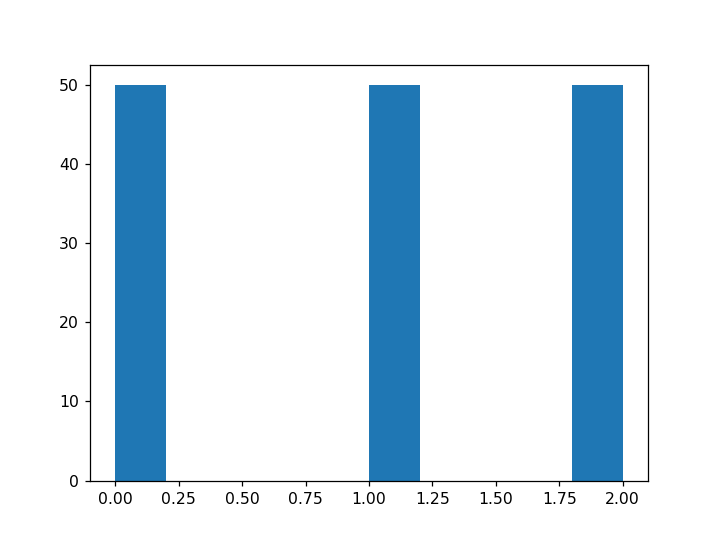

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

In [12]:
# class distribution
fig, ax = plt.subplots()
ax.hist(df["species"])

# Get data to train model

In [13]:
# get variables (X)
X = df.drop("species", axis = 1).values

# get labels (y)
y = df["species"].values

In [14]:
# split dataset into train and temp
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.5)

In [15]:
# split dataset into validaiton adn testing
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size = 0.5)

In [16]:
# check shape
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(150, 4)
(75, 4)
(37, 4)
(38, 4)


In [17]:
# check datatype
type(X_train)

numpy.ndarray

In [18]:
# transorm arrays into Pytorch tensors
X_train = torch.FloatTensor(X_train)
X_val = torch.FloatTensor(X_val)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_val = torch.LongTensor(y_val)
y_test = torch.LongTensor(y_test)

In [19]:
type(X_train)

torch.Tensor

# Create NN model

In [109]:
# define model
# you need to define:
# 1) Init method: define layers
# 2) forward method: flow information
class my_neural_network(nn.Module):
    
    # init method
    # here define the layers
    def __init__(self, input_dim = 4, hidden_layer = 25, output_dim = 3):
        
        super().__init__()
        
        # first fully connected lyaer
        self.fc1 = nn.Linear(input_dim, hidden_layer)
        
#         # second fully connected layer
#         self.fc2 = nn.Linear(hidden_layer, hidden_layer)
        
        # activation function
        self.act = nn.ReLU()
        
        # output layer
        self.output = nn.Linear(hidden_layer, output_dim)
        
        
        
    # forward method
    def forward(self, x):
        
        # first layer
        x = self.act(self.fc1(x))
        
#         # second layer
#         x = self.act(self.fc2(x))
        
        # ouput layer
        x = self.output(x)
        
        # return output
        return x

In [110]:
# define model
model = my_neural_network()

# display model
print(model)

my_neural_network(
  (fc1): Linear(in_features=4, out_features=25, bias=True)
  (act): ReLU()
  (output): Linear(in_features=25, out_features=3, bias=True)
)


# Define methods to train model

In [111]:
# cost function
costFunction = nn.CrossEntropyLoss()

# define optimzer algorithm
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# Train model

<IPython.core.display.Javascript object>


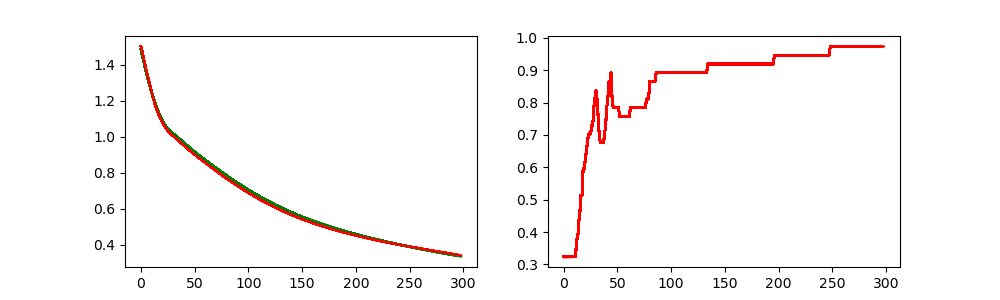

In [112]:
# define epoch
epochs = 300

# loss values
trainLoss = np.zeros(shape = (epochs))
validLoss = np.zeros(shape = (epochs))

# metrics
validAcc = np.zeros(shape = (epochs))

# plot 
fig, ax = plt.subplots(1, 2, figsize = (10, 3))

# loop with epochs
for i in range(epochs):
        
    # TRAIN subsets
    
    # get model predictions
    predictions = model.forward(X_train)
    
    # get cost function value
    loss = costFunction(predictions, y_train)
    
    # save loss value
    trainLoss[i] = loss
    
    # get to zero the gradient 
    optimizer.zero_grad()
    
    # get gradient value using backprop
    loss.backward()
    
    # update parameters
    optimizer.step()
    
    
    
    # VALIDATION subset
    
    # get model predictions
    predictionsVal = model.forward(X_val)

    
    #get loss value
    lossVal = costFunction(predictionsVal, y_val)
    
    # save loss value
    validLoss[i] = lossVal
    
    # get accuracy value
    validAcc[i] = accuracy_score(
        
        # true values (labels),
        y_val.detach().numpy(),
        
        # predicted values
        torch.argmax(predictionsVal, 1).detach().numpy(),
        
    )
    
    
    
    # plot 
    
    # add train loss
    ax[0].plot(trainLoss[0: i], c = "green")
    ax[0].plot(validLoss[0: i], c = "red")
    
    # lpot metric
    ax[1].plot(validAcc[0: i], c = "red")
    
    # plot
    fig.canvas.draw()

# Analize on test dataset (unseen data)

In [113]:
# get test predictions
predictionsTest = model.forward(X_test)

# get predictions
predictionsTest = torch.argmax(predictionsTest, 1)

<IPython.core.display.Javascript object>


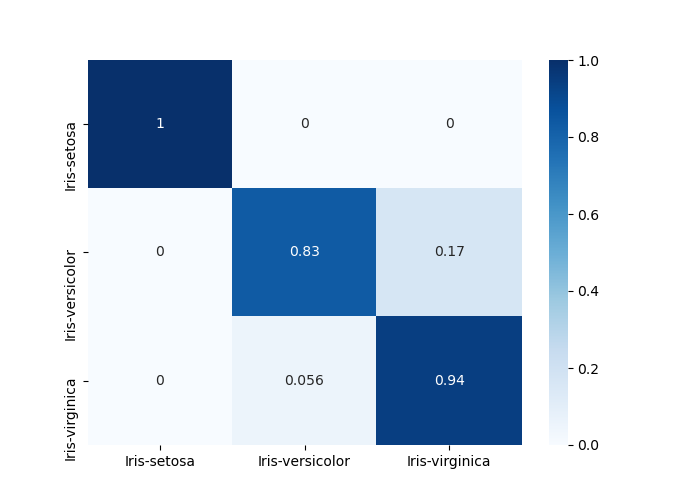

<AxesSubplot:>

In [115]:
# get confusion matrix
cm = confusion_matrix(
    
    # labels
    y_test,
    
    # prediction
    predictionsTest,
    
    normalize = "true",
    
)

fig0, ax = plt.subplots(figsize = (7, 5))


# plot matrix
sn.heatmap(
    
    # confusion matrix
    cm, 
    
    # add values in each cell
    annot = True,
    
    # add lables to matrix
    yticklabels = [x for x in mappings],
    xticklabels = [x for x in mappings],

    # change color values
    cmap = plt.cm.Blues,
)

In [116]:
# get classification report
print(
    classification_report(
        y_test,
        predictionsTest,
        
    )
)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.83      0.87        12
           2       0.89      0.94      0.92        18

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

